# Kaggle diamonds competition

## Imports

In [180]:
import pandas as pd
import seaborn as sns


In [181]:
df = pd.read_csv('./diamonds-datamad0921/train.csv')


In [182]:
df2 = pd.read_csv('./diamonds-datamad0921/test.csv')

In [183]:
df2


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,SI1,59.6,60.0,6.74,6.70,4.00
13481,13481,0.90,Very Good,D,SI1,62.1,60.0,6.14,6.20,3.83
13482,13482,0.30,Ideal,F,VS2,62.1,53.3,4.30,4.32,2.68
13483,13483,1.25,Ideal,I,SI1,59.6,59.0,7.01,7.09,4.20


In [184]:
df2.cut = df2.cut.map(diamond_cut_rank)

In [185]:
df2.color = df2.color.map(diamond_color_rank)

In [186]:
df2.clarity = df2.clarity.map(diamond_clarity_rank)

## Initial exploration

In [187]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [188]:
df.shape

(40455, 11)

In [189]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [190]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [191]:
df.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

<AxesSubplot:xlabel='price', ylabel='Count'>

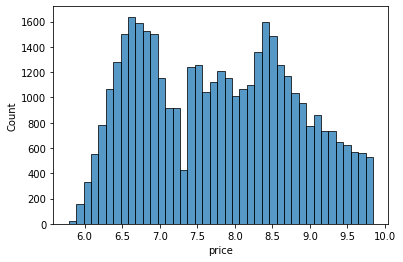

In [192]:
sns.histplot(df.price)

## Feature engineering

### Diamonds cut

In [193]:
df.cut.value_counts()

Ideal        16230
Premium      10338
Very Good     9003
Good          3682
Fair          1202
Name: cut, dtype: int64

In [194]:
diamond_cut_rank = {
    'Ideal': 5, 
    'Premium': 4, 
    'Very Good': 3, 
    'Good': 2,
    'Fair' : 1
}

In [195]:
df.cut = df.cut.map(diamond_cut_rank)

In [196]:
df.cut.value_counts()

5    16230
4    10338
3     9003
2     3682
1     1202
Name: cut, dtype: int64

### Diamond color

In [197]:
df.color.value_counts()

G    8410
E    7368
F    7182
H    6203
D    5100
I    4070
J    2122
Name: color, dtype: int64

In [198]:
diamond_color_rank = {
    'D': 7, 
    'E': 6, 
    'F': 5, 
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

In [199]:
df.color = df.color.map(diamond_color_rank)

In [200]:
df.color.value_counts()

4    8410
6    7368
5    7182
3    6203
7    5100
2    4070
1    2122
Name: color, dtype: int64

## Diamond Clarity

In [201]:
df.clarity.value_counts()

SI1     9779
VS2     9259
SI2     6921
VS1     6079
VVS2    3745
VVS1    2807
IF      1312
I1       553
Name: clarity, dtype: int64

In [202]:
diamond_clarity_rank = {
    'FL': 9, 
    'IF': 8, 
    'VVS1': 7, 
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
}

In [203]:
df.clarity = df.clarity.map(diamond_clarity_rank)

### Making sure all variables are now numeric values.

In [204]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,4,7,2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,5,6,6,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,5,5,4,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,3,4,2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,4,4,5,62.3,59.0,4.50,4.55,2.82,6.588


In [205]:
df.dtypes

id           int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [206]:
df.corr()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.003045,-0.000372,0.003016,0.004427,-0.000405,0.000783,-0.002447,-0.001936,-0.001273,-0.003194
carat,-0.003045,1.000000,-0.131069,-0.293307,-0.353255,0.023585,0.185478,0.974648,0.944419,0.947469,0.920064
cut,-0.000372,-0.131069,1.000000,0.017590,0.188554,-0.215352,-0.431195,-0.122895,-0.117832,-0.145396,-0.084878
color,0.003016,-0.293307,0.017590,1.000000,-0.023444,-0.047839,-0.028516,-0.272222,-0.263498,-0.268702,-0.157426
clarity,0.004427,-0.353255,0.188554,-0.023444,1.000000,-0.066904,-0.161419,-0.371745,-0.355509,-0.364293,-0.213649
depth,-0.000405,0.023585,-0.215352,-0.047839,-0.066904,1.000000,-0.299203,-0.029867,-0.033960,0.089474,-0.003292
table,0.000783,0.185478,-0.431195,-0.028516,-0.161419,-0.299203,1.000000,0.200374,0.186788,0.153726,0.162804
x,-0.002447,0.974648,-0.122895,-0.272222,-0.371745,-0.029867,0.200374,1.000000,0.967315,0.965496,0.957668
y,-0.001936,0.944419,-0.117832,-0.263498,-0.355509,-0.033960,0.186788,0.967315,1.000000,0.941176,0.928909
z,-0.001273,0.947469,-0.145396,-0.268702,-0.364293,0.089474,0.153726,0.965496,0.941176,1.000000,0.930014


In [211]:
df.to_csv("train_clean.csv",index=False)

In [210]:
df2.to_csv("test_clean.csv",index=False)